# TensorFlow 2.0

In [1]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt

%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 50
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [14]:
train_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train/*.png')[:1000]
test_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test/*.png')[:1000]

In [15]:
def get_class_name(path):
    return path.split('_')[-1].replace('.png', '')

In [16]:
train_labels = [get_class_name(path) for path in train_paths]
class_names = np.unique(train_labels)

In [17]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return tf.argmax(onehot)  # 이번에는 onehot이 아닌 label 번호로

In [18]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image, tf.float32) / 255.  # rescale
    
    label = get_label(path)
    return image, label

In [19]:
def image_preprocess(image, label):
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(image_preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [22]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

## Training

In [23]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

history = model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/31 [==============================] - 4s 98ms/step - loss: 2.3294 - accuracy: 0.0948 - val_loss: 2.2884 - val_accuracy: 0.1129
Epoch 2/50
31/31 [==============================] - 3s 93ms/step - loss: 2.2609 - accuracy: 0.1354 - val_loss: 2.2055 - val_accuracy: 0.1512
Epoch 3/50
31/31 [==============================] - 3s 103ms/step - loss: 2.1930 - accuracy: 0.1639 - val_loss: 2.1316 - val_accuracy: 0.1915
Epoch 4/50
31/31 [==============================] - 3s 103ms/step - loss: 2.1532 - accuracy: 0.1762 - val_loss: 2.1145 - val_accuracy: 0.1895
Epoch 5/50
31/31 [==============================] - 3s 100ms/step - loss: 2.1274 - accuracy: 0.2113 - val_loss: 2.0606 - val_accuracy: 0.2308
Epoch 6/50
31/31 [==============================] - 3s 102ms/step - loss: 2.0317 - accuracy: 0.2608 - val_loss: 2.0066 - val_accuracy: 0.2389
Epoch 7/50
31/31 [==============================] - 3s 102ms/step - loss: 1.9391 - accuracy: 0.2386 - val_loss: 2.0025 - val_accuracy: 0.2419
Epoch 8/

# History 들여다 보기 

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 31}

In [26]:
new_model = history.model

In [28]:
history.history['accuracy']

[0.10123966634273529,
 0.1373966932296753,
 0.17045454680919647,
 0.18801653385162354,
 0.21487602591514587,
 0.24495968222618103,
 0.24894067645072937,
 0.2737603187561035,
 0.30061984062194824,
 0.2933467626571655,
 0.29648759961128235,
 0.3099173605442047,
 0.3264462947845459,
 0.3442796468734741,
 0.30785122513771057,
 0.3447580635547638,
 0.3569915294647217,
 0.3770161271095276,
 0.37603306770324707,
 0.3822314143180847,
 0.40783897042274475,
 0.4193548262119293,
 0.4036017060279846,
 0.4152892529964447,
 0.4243951737880707,
 0.4524793326854706,
 0.43388429284095764,
 0.43285122513771057,
 0.4524793326854706,
 0.4927685856819153,
 0.4886363744735718,
 0.49896693229675293,
 0.5216942429542542,
 0.49793389439582825,
 0.5050403475761414,
 0.49152541160583496,
 0.5268595218658447,
 0.5342742204666138,
 0.5328390002250671,
 0.5516529083251953,
 0.5816115736961365,
 0.5681818127632141,
 0.5735887289047241,
 0.570974588394165,
 0.5816115736961365,
 0.6098790168762207,
 0.5815678238868713

In [29]:
history.history['loss']

[2.3088245391845703,
 2.2515950202941895,
 2.1994967460632324,
 2.141486167907715,
 2.102888345718384,
 2.038902997970581,
 1.9625765085220337,
 1.9340226650238037,
 1.859771966934204,
 1.864128828048706,
 1.8744237422943115,
 1.821719765663147,
 1.819710612297058,
 1.7788714170455933,
 1.7781219482421875,
 1.7321240901947021,
 1.7160032987594604,
 1.6551593542099,
 1.698208212852478,
 1.7005698680877686,
 1.668947696685791,
 1.6068377494812012,
 1.6003772020339966,
 1.556707501411438,
 1.563904881477356,
 1.5163851976394653,
 1.5101271867752075,
 1.4921334981918335,
 1.4726849794387817,
 1.4062235355377197,
 1.4351661205291748,
 1.381158471107483,
 1.3503419160842896,
 1.3723090887069702,
 1.3950812816619873,
 1.3545948266983032,
 1.2792689800262451,
 1.2495039701461792,
 1.3194489479064941,
 1.2390559911727905,
 1.18731689453125,
 1.2300899028778076,
 1.160092830657959,
 1.1761366128921509,
 1.1361054182052612,
 1.1280817985534668,
 1.1634540557861328,
 1.1144012212753296,
 1.0173406

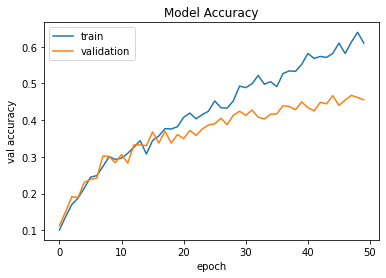

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('val accuracy')
plt.legend(['train','validation'])
plt.show()

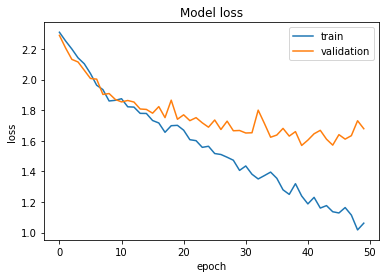

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()